In [1]:
#importing required libraries

import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from  matplotlib import pyplot

In [2]:
# setting working directory
os.chdir("C:/Users/Puja/Documents/bike rental")
os.getcwd()

'C:\\Users\\Puja\\Documents\\bike rental'

In [3]:
# reading data into dataframe
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_data['dteday'].head()

0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
Name: dteday, dtype: object

In [5]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

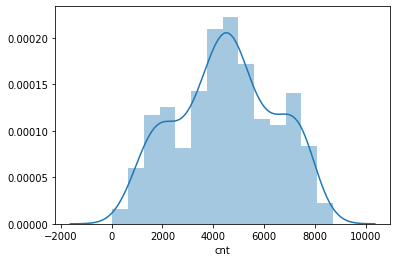

In [6]:
#Exploratory data analysis

# Univariate Analysis 
# Target variable  analysis

#descriptive statistics summary
bike_data['cnt'].describe()

#Check whether target variable is normal or not
sns.distplot(bike_data['cnt']);

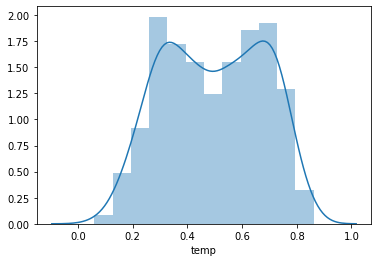

In [7]:
#Check whether  variable 'temp'is normal or not
sns.distplot(bike_data['temp']);

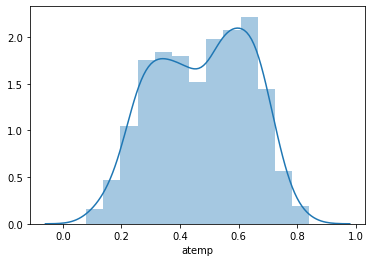

In [8]:
#Check whether  variable 'atemp'is normal or not
sns.distplot(bike_data['atemp']);

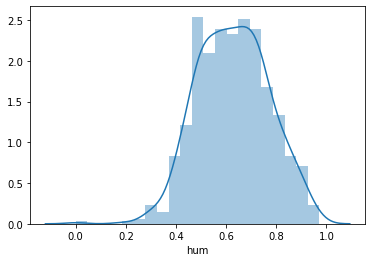

In [9]:
#Check whether  variable 'hum'is normal or not
sns.distplot(bike_data['hum']);

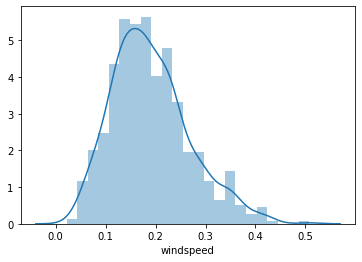

In [10]:
#Check whether  variable 'windspeed'is normal or not
sns.distplot(bike_data['windspeed']);

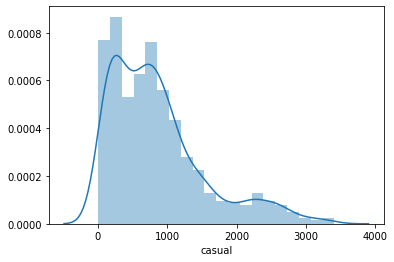

In [11]:
#Check whether  variable 'casual'is normal or not
sns.distplot(bike_data['casual']);

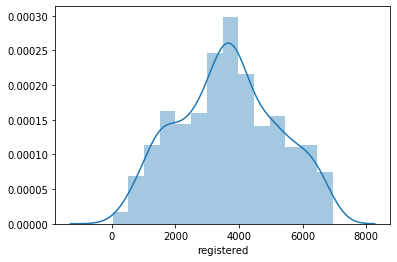

In [12]:
#Check whether  variable 'registered'is normal or not
sns.distplot(bike_data['registered']);

In [13]:
# checking skewness of plot of target variable "count"

print("Skewness: %f" % bike_data['cnt'].skew())
print("Kurtosis: %f" % bike_data['cnt'].kurt())

#Here Skewness is very less so target variable  is normal distribution

Skewness: -0.047353
Kurtosis: -0.811922


In [14]:
#exploratory data analysis
#Feature engineering
bike_data['season']= bike_data['season'].astype('category')
bike_data['yr']=bike_data['yr'].astype('int')
bike_data['mnth']=bike_data['mnth'].astype('category')
bike_data['holiday']=bike_data['holiday'].astype('int')
bike_data['workingday']=bike_data['workingday'].astype('int')
bike_data['weekday']=bike_data['weekday'].astype('category')
bike_data['weathersit']=bike_data['weathersit'].astype('category')

d1=bike_data['dteday'].copy()
for i in range (0,d1.shape[0]):
    d1[i]=dt.datetime.strptime(d1[i], '%Y-%m-%d').strftime('%d')
bike_data['dteday']=d1

bike_data['dteday']=bike_data['dteday'].astype('category')
bike_data = bike_data.drop(['instant','casual', 'registered'], axis=1)

In [15]:
bike_data.dtypes

dteday        category
season        category
yr               int32
mnth          category
holiday          int32
weekday       category
workingday       int32
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [16]:
bike_data['dteday'].head()

0    01
1    02
2    03
3    04
4    05
Name: dteday, dtype: category
Categories (31, object): [01, 02, 03, 04, ..., 28, 29, 30, 31]

In [17]:
# Missing value analysis
missing_val = bike_data.isnull().sum() 
missing_val


dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Text(0.5, 1.0, 'Box plot of temp variable')

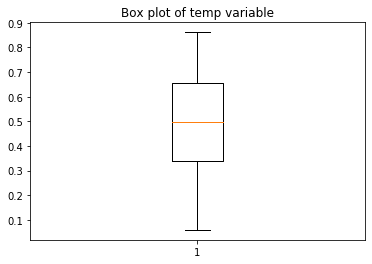

In [18]:
#Outlier Analysis

cnames=["temp","atemp","hum","windspeed",]
#ploting boxplot to visualize outliers
plt.boxplot(bike_data['temp'])
plt.title('Box plot of temp variable')

Text(0.5, 1.0, 'Box plot of atemp variable')

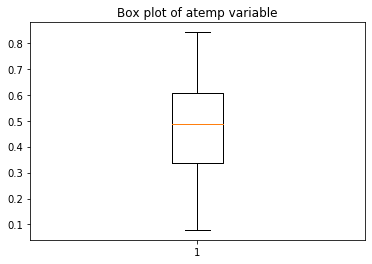

In [19]:
plt.boxplot(bike_data['atemp'])
plt.title('Box plot of atemp variable')

Text(0.5, 1.0, 'Box plot of hum variable')

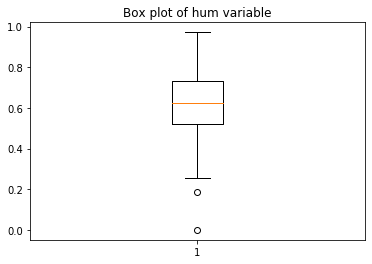

In [20]:
plt.boxplot(bike_data['hum'])
plt.title('Box plot of hum variable')

Text(0.5, 1.0, 'Box plot of windspeed variable')

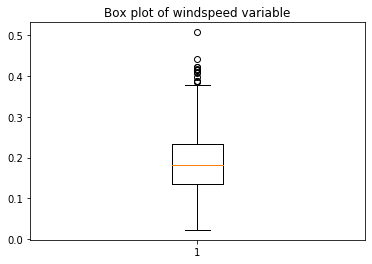

In [21]:
plt.boxplot(bike_data['windspeed'])
plt.title('Box plot of windspeed variable')

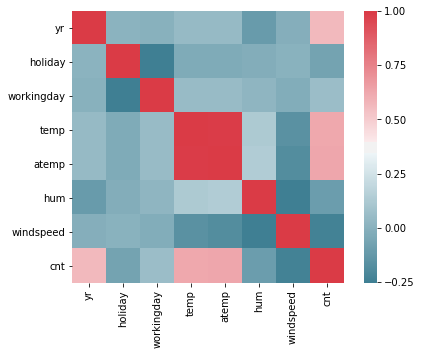

In [22]:
#Feature Selection 

df_corr = bike_data
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [23]:
#droping corelated variable
bike_data = bike_data.drop(['atemp'], axis=1)

In [24]:
# Modeling 

#dividing data into train and test
train, test = train_test_split(bike_data, test_size=0.2)

In [25]:
# Decision Tree (c50)
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:11], train.iloc[:,11])
predictions_DT = fit_DT.predict(test.iloc[:,0:11])
predictions_DT

array([6643.03589744, 6643.03589744, 6643.03589744, 2271.47580645,
       6643.03589744, 2271.47580645, 2271.47580645, 4371.15584416,
       4371.15584416, 4020.41441441, 2271.47580645, 4020.41441441,
       4371.15584416, 4020.41441441, 6643.03589744, 2271.47580645,
       4020.41441441, 4371.15584416, 2271.47580645, 4371.15584416,
       4020.41441441, 4371.15584416, 4371.15584416, 4371.15584416,
       4371.15584416, 6643.03589744, 2271.47580645, 4371.15584416,
       2271.47580645, 4371.15584416, 4371.15584416, 6643.03589744,
       6643.03589744, 4371.15584416, 2271.47580645, 4371.15584416,
       6643.03589744, 4371.15584416, 2271.47580645, 4371.15584416,
       4371.15584416, 6643.03589744, 4020.41441441, 4020.41441441,
       6643.03589744, 4371.15584416, 2271.47580645, 4371.15584416,
       2271.47580645, 2271.47580645, 6643.03589744, 4020.41441441,
       4371.15584416, 6643.03589744, 4371.15584416, 4371.15584416,
       4371.15584416, 4371.15584416, 4371.15584416, 4020.41441

In [26]:
#random forest
RFmodel = RandomForestRegressor(n_estimators = 200).fit(train.iloc[:,0:11], train.iloc[:,11])
RF_Predictions = RFmodel.predict(test.iloc[:,0:11])
RF_Predictions

array([6718.425, 6352.505, 6054.72 , 1522.695, 6450.8  , 1424.305,
       3396.735, 4244.265, 4429.34 , 2998.39 , 1410.015, 3811.985,
       2739.755, 3290.935, 7519.62 , 1815.335, 5031.205, 3979.88 ,
       3668.28 , 4838.31 , 5566.505, 4546.13 , 3725.35 , 4787.23 ,
       4263.35 , 6890.485, 4084.71 , 3240.695, 1203.745, 3840.19 ,
       3651.64 , 6327.12 , 6261.535, 4263.425, 1934.365, 4183.29 ,
       7038.595, 5111.365, 3154.225, 4232.51 , 4398.485, 7282.885,
       2765.515, 5500.06 , 5813.825, 4035.29 , 1385.845, 4929.38 ,
       2232.05 , 1692.91 , 6668.415, 2346.075, 3994.73 , 7239.835,
       4475.48 , 3737.88 , 3526.535, 4598.275, 4772.555, 4043.2  ,
       1749.24 , 1899.73 , 5853.775, 1932.715, 4218.58 , 2055.44 ,
       2655.595, 5938.675, 3786.955, 3388.97 , 1475.75 , 6536.945,
       5103.62 , 3639.805, 4673.24 , 6517.705, 6289.325, 5305.8  ,
       4786.02 , 1895.13 , 3669.74 , 6360.455, 2672.815, 1554.475,
       4530.215, 6123.475, 5494.58 , 2347.825, 5046.58 , 3324.

In [27]:
#linear regression
#creating dummy variable
data_lr=bike_data.copy()
cat_names = ["season", "dteday", "weathersit", "mnth","weekday"]
for i in cat_names:
    temp = pd.get_dummies(data_lr[i], prefix = i)
    data_lr = data_lr.join(temp)
fields_to_drop = ['dteday', 'season', 'weathersit', 'weekday', 'mnth','cnt']
data_lr = data_lr.drop(fields_to_drop, axis=1)
data_lr=data_lr.join(bike_data['cnt'])

In [28]:
trainlr, testlr = train_test_split(data_lr, test_size=0.2)
model = sm.OLS(trainlr.iloc[:,63], trainlr.iloc[:,0:63]).fit()
predictions_LR = model.predict(testlr.iloc[:,0:63])
predictions_LR

105    1099.618242
99     2714.526538
418    4948.259295
590    6949.816176
316    3301.355991
544    7338.562226
253    5074.786177
461    5784.898265
199    4900.495570
233    4293.563211
575    5589.002984
653    6207.633986
269    5032.165102
337    3397.760035
279    5354.161608
19     1528.687806
542    6377.800451
336    3813.744625
237    4980.248936
58      898.607779
656    6179.045852
478    4319.154501
621    7220.727287
509    6508.069201
205    4501.009328
310    3675.174330
415    3313.272053
488    6226.588276
517    5760.210004
311    3729.344674
          ...     
369    4034.626020
572    6443.329946
645    5584.819050
604    6518.411768
140    5287.161329
344    3448.275967
711    5045.117094
501    7151.206435
719    5393.073740
272    5513.359700
236    3981.937523
624    6949.983855
620    7111.191524
413    4237.247259
334    3218.560945
116    3139.306650
710    4990.880452
616    5951.214900
474    6490.104535
81     2731.650194
414    2953.120255
706    4960.

In [29]:
#defining MAPE function
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [30]:
#MAPE for decision tree regression
MAPE(test.iloc[:,11], predictions_DT)

33.58692028012967

In [31]:
#MAPE for random forest regression
MAPE(test.iloc[:,11],RF_Predictions)

17.895845021938175

In [32]:
#MAPE for linear regression
MAPE(testlr.iloc[:,63], predictions_LR)

18.405518038175295

In [33]:
result=pd.DataFrame(test.iloc[:,0:11])
result['pred_cnt'] = (RF_Predictions)
#result['pred_cnt'] = (predictions_LR)

result.to_csv("Random forest output python.csv",index=False)

In [34]:
train.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
1,02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
637,29,4,1,9,0,6,0,1,0.542500,0.542917,0.227604,8555
123,04,2,0,5,0,3,1,2,0.414167,0.737083,0.328996,2633
262,20,3,0,9,0,2,1,2,0.561667,0.881250,0.134954,3641
684,15,4,1,11,0,4,1,2,0.321667,0.620417,0.152987,5445


In [35]:
new = pd.read_csv("Random forest output python.csv")

In [36]:
new.head(1)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,pred_cnt
0,19,3,1,7,0,4,1,1,0.77,0.600417,0.165429,6718.425


([<matplotlib.axis.XTick at 0x22f2ccaaa58>,
 <a list of 4 Text xticklabel objects>)

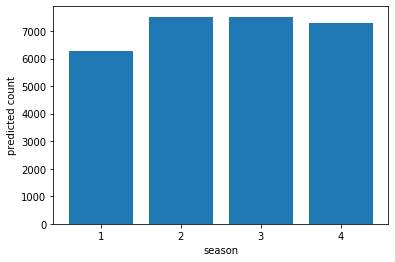

In [37]:
# Visualization and comparision of predicted count and actual count

plt.bar(new['season'],new['pred_cnt'])
plt.ylabel('predicted count')
plt.xlabel('season')
plt.xticks(np.arange(1, 5, step=1))


In [38]:
bike_data.head(1)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985


([<matplotlib.axis.XTick at 0x22f2cf79048>,
 <a list of 4 Text xticklabel objects>)

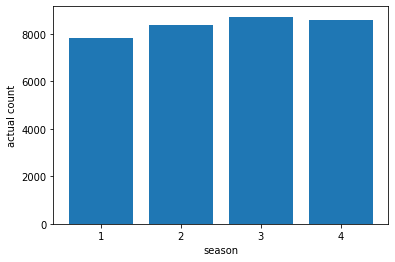

In [39]:
plt.bar(bike_data['season'],bike_data['cnt'])
plt.ylabel('actual count')
plt.xlabel('season')
plt.xticks(np.arange(1, 5, step=1))

([<matplotlib.axis.XTick at 0x22f2f8cbd30>,
 <a list of 3 Text xticklabel objects>)

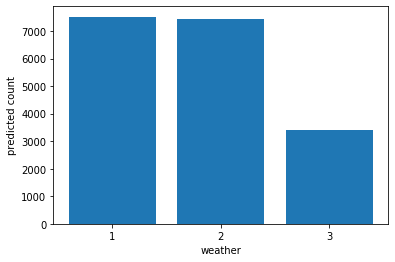

In [40]:
plt.bar(new['weathersit'],new['pred_cnt'])
plt.ylabel('predicted count')
plt.xlabel('weather')
plt.xticks(np.arange(1, 4, step=1))

([<matplotlib.axis.XTick at 0x22f2fc21898>,
 <a list of 3 Text xticklabel objects>)

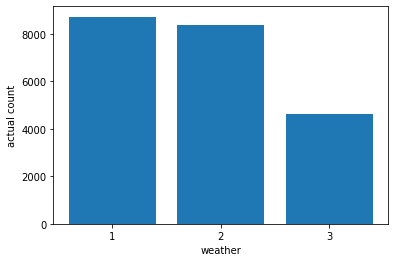

In [41]:
plt.bar(bike_data['weathersit'],bike_data['cnt'])
plt.ylabel('actual count')
plt.xlabel('weather')
plt.xticks(np.arange(1, 4, step=1))

In [42]:
from sklearn.metrics import mean_squared_error

from math import sqrt

#rmse = sqrt(mean_squared_error(y_actual, y_predicted))
rmse = sqrt(mean_squared_error(test.iloc[:,11],RF_Predictions))

test.iloc[:,11],RF_Predictions

print(rmse)

723.1702791588392


In [43]:
rmse = sqrt(mean_squared_error(test.iloc[:,11], predictions_DT))
print(rmse)

1103.0824216810838


In [44]:
rmse = sqrt(mean_squared_error(testlr.iloc[:,63], predictions_LR))
print(rmse)

895.9316757226527
